### *--DATA LOADING--*

1. Importing Libraries

In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

2. Reading the CSV file into a DataFrame

In [78]:
df = pd.read_csv('House_Rent_Dataset.csv')

3. Display the first five rows of the DataFrame to confirm it's loaded

In [79]:
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


4. Print a summary of the DataFrame to check data types and missing values

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


### *--DATA CLEANING--*

In [81]:
# 1. Handle missing values
# We will check for any null values and drop the rows if they exist.
print("\nChecking for missing values...")
print(df.isnull().sum())
    
initial_rows = len(df)
df_cleaned = df.dropna().copy()
rows_dropped_na = initial_rows - len(df_cleaned)
print(f"\n{rows_dropped_na} rows with missing values were dropped.")
    
# 2. Remove duplicate rows
 # Identify and remove any rows that are exact duplicates.
print("\nChecking for duplicate rows...")
initial_rows = len(df_cleaned)
df_cleaned.drop_duplicates(inplace=True)
rows_dropped_dups = initial_rows - len(df_cleaned)
print(f"{rows_dropped_dups} duplicate rows were removed.")

# 3. Convert 'Posted On' to datetime objects
# This allows for time-series analysis later on.
print("\nConverting 'Posted On' to datetime...")
df_cleaned['Posted On'] = pd.to_datetime(df_cleaned['Posted On'])
    
# 4. Clean the 'Floor' column
# Extract the first number from the 'Floor' string (e.g., '1 out of 3' becomes 1).
print("Cleaning 'Floor' column to extract floor number...")
df_cleaned['Floor_Number'] = df_cleaned['Floor'].str.extract('(\d+)').astype(float)


Checking for missing values...
Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

0 rows with missing values were dropped.

Checking for duplicate rows...
0 duplicate rows were removed.

Converting 'Posted On' to datetime...
Cleaning 'Floor' column to extract floor number...


<>:27: SyntaxWarning: invalid escape sequence '\d'
<>:27: SyntaxWarning: invalid escape sequence '\d'
C:\Users\ASUS\AppData\Local\Temp\ipykernel_8568\216146934.py:27: SyntaxWarning: invalid escape sequence '\d'
  df_cleaned['Floor_Number'] = df_cleaned['Floor'].str.extract('(\d+)').astype(float)


5. Final summary of the cleaned dataset

In [82]:
print("\n--- Cleaning Complete! ---")
print("Final dimensions of the cleaned dataset:", df_cleaned.shape)
print("Cleaned data types:")
print(df_cleaned.info())
print("\nFirst 5 rows of the cleaned dataset:")
print(df_cleaned.head())


--- Cleaning Complete! ---
Final dimensions of the cleaned dataset: (4746, 13)
Cleaned data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Posted On          4746 non-null   datetime64[ns]
 1   BHK                4746 non-null   int64         
 2   Rent               4746 non-null   int64         
 3   Size               4746 non-null   int64         
 4   Floor              4746 non-null   object        
 5   Area Type          4746 non-null   object        
 6   Area Locality      4746 non-null   object        
 7   City               4746 non-null   object        
 8   Furnishing Status  4746 non-null   object        
 9   Tenant Preferred   4746 non-null   object        
 10  Bathroom           4746 non-null   int64         
 11  Point of Contact   4746 non-null   object        
 12  Floor_Number      

6. Save the cleaned dataset to a new CSV file

In [83]:
df.to_csv('Cleaned_Dataset.csv', index=False)

### *--DATA ANALYSIS--*

1. Define a custom color palette

In [84]:
custom_palette = ["#212121", "#B71C1C", "#FFC107", "#FF9800"]
sns.set_palette(custom_palette)

# Set the style to whitegrid for better readability
sns.set_style("whitegrid")
plt.style.use('seaborn-v0_8-whitegrid')

2. What is the average rent per square foot for each city, and which city has the highest?

In [85]:
print("\n--- Solution: Average rent per sqft per city ---")
df['Rent_per_sqft'] = df['Rent'] / df['Size']
avg_rent_per_sqft = df.groupby('City')['Rent_per_sqft'].mean().sort_values(ascending=False)
print(avg_rent_per_sqft)


--- Solution: Average rent per sqft per city ---
City
Mumbai       81.668894
Delhi        67.631495
Hyderabad    23.585529
Bangalore    21.751740
Chennai      19.785751
Kolkata      16.491473
Name: Rent_per_sqft, dtype: float64


3. Visualize the average rent per square foot per city using a bar plot.


--- Solution: Bar plot of average rent per sqft ---


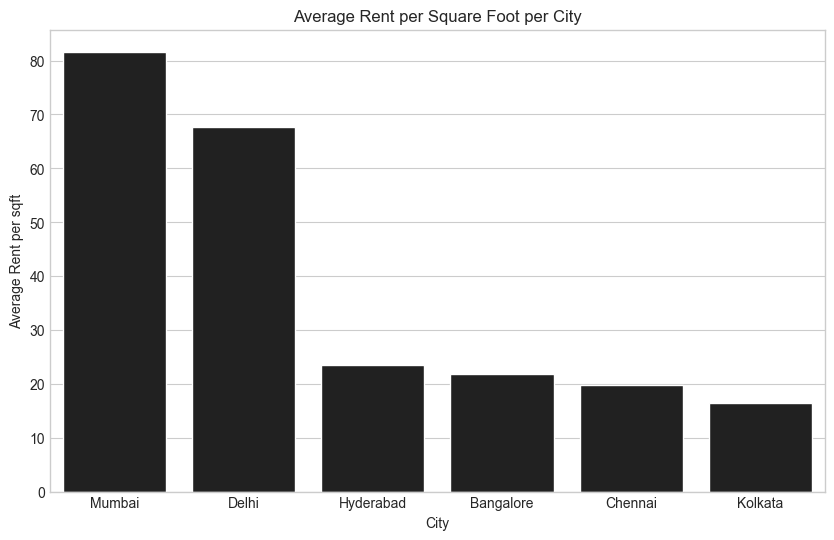

In [86]:
print("\n--- Solution: Bar plot of average rent per sqft ---")
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_rent_per_sqft.index, y=avg_rent_per_sqft.values)
plt.title('Average Rent per Square Foot per City')
plt.xlabel('City')
plt.ylabel('Average Rent per sqft')
plt.show()

4. How does the distribution of rent vary across different cities? Use a violin plot for this.


--- Solution: Violin plot of rent distribution by city ---


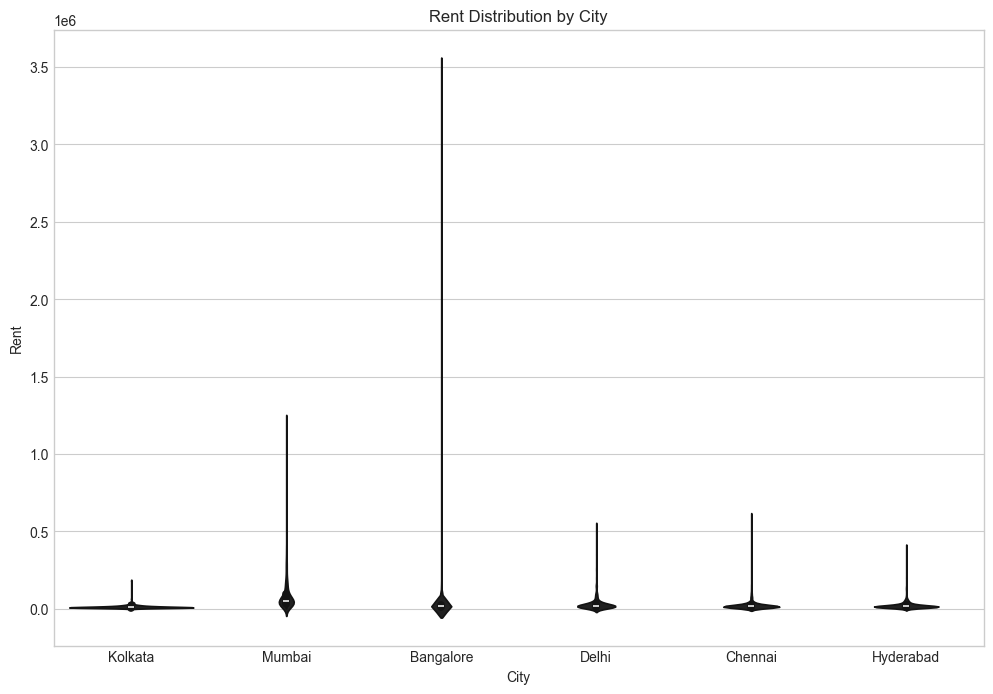

In [87]:
print("\n--- Solution: Violin plot of rent distribution by city ---")
plt.figure(figsize=(12, 8))
sns.violinplot(x='City', y='Rent', data=df)
plt.title('Rent Distribution by City')
plt.xlabel('City')
plt.ylabel('Rent')
plt.show()

5. Identify the top 3 most expensive localities in each city based on average rent.

In [88]:
print("\n--- Solution: Top 3 most expensive localities per city ---")
top_localities = df.groupby('City').apply(lambda x: x.groupby('Area Locality')['Rent'].mean().nlargest(3))
print(top_localities)


--- Solution: Top 3 most expensive localities per city ---
City       Area Locality                       
Bangalore  Marathahalli                             715780.0
           Lavelle Road                             215000.0
           Sarakki Nagar, J P Nagar                 180000.0
Chennai    Vettuvankeni                             600000.0
           Madras Boat Club Road                    265000.0
           Poes Garden, Teynampet                   235000.0
Delhi      Sundar Nagar                             350000.0
           Anand Niketan                            330000.0
           Maharani Bagh, New Friends Colony        280000.0
Hyderabad  Bandlaguda Jagir,, Hyderabad             300000.0
            Beeramguda, Ramachandra Puram, NH 9     200000.0
           K P H B Phase 4                          200000.0
Kolkata    Avenue S, Santoshpur                     180000.0
           Vedic Village, Rajarhat                   65000.0
           New Town Action Area 1     

C:\Users\ASUS\AppData\Local\Temp\ipykernel_8568\1922955459.py:2: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_localities = df.groupby('City').apply(lambda x: x.groupby('Area Locality')['Rent'].mean().nlargest(3))


6. Create a heatmap to visualize the relationship between 'BHK', 'Bathroom', and the average 'Rent'.


--- Solution: Heatmap of average rent by BHK and Bathroom ---


C:\Users\ASUS\AppData\Local\Temp\ipykernel_8568\3644835629.py:2: FutureWarning: The provided callable <function mean at 0x000002C629F0AE80> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  bhk_bathroom_rent = df.pivot_table(values='Rent', index='BHK', columns='Bathroom', aggfunc=np.mean)


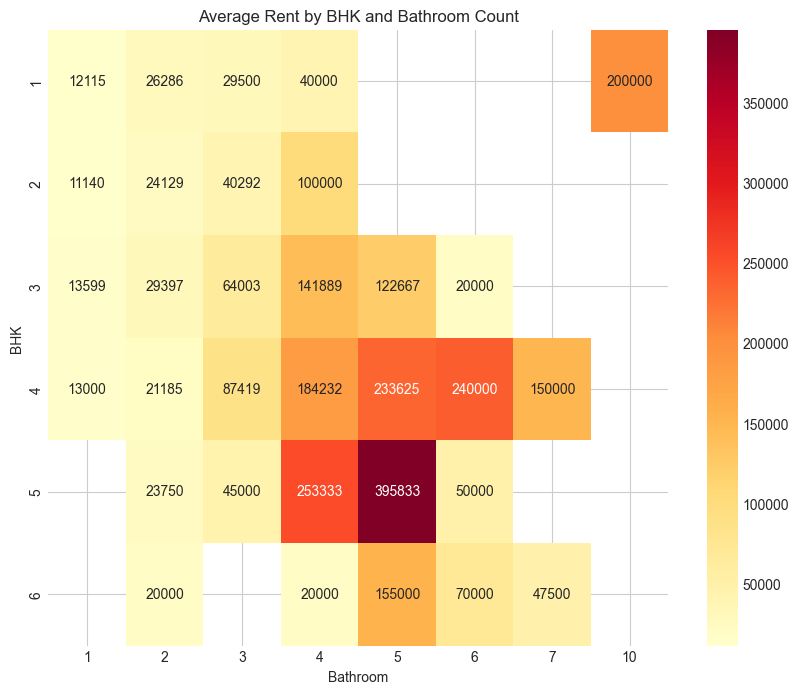

In [89]:
print("\n--- Solution: Heatmap of average rent by BHK and Bathroom ---")
bhk_bathroom_rent = df.pivot_table(values='Rent', index='BHK', columns='Bathroom', aggfunc=np.mean)
plt.figure(figsize=(10, 8))
sns.heatmap(bhk_bathroom_rent, annot=True, fmt=".0f", cmap='YlOrRd')
plt.title('Average Rent by BHK and Bathroom Count')
plt.show()


7. What is the standard deviation of rent for each furnishing status?

In [90]:
print("\n--- Solution: Standard deviation of rent by furnishing status ---")
rent_std_by_furnishing = df.groupby('Furnishing Status')['Rent'].agg(np.std)
print(rent_std_by_furnishing)


--- Solution: Standard deviation of rent by furnishing status ---
Furnishing Status
Furnished         80630.842518
Semi-Furnished    98138.207692
Unfurnished       35167.729070
Name: Rent, dtype: float64


C:\Users\ASUS\AppData\Local\Temp\ipykernel_8568\339302298.py:2: FutureWarning: The provided callable <function std at 0x000002C629F0AFC0> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  rent_std_by_furnishing = df.groupby('Furnishing Status')['Rent'].agg(np.std)


8. Analyze the count of different 'Area Type' (e.g., 'Carpet Area') for each city.


--- Solution: Area type counts by city ---


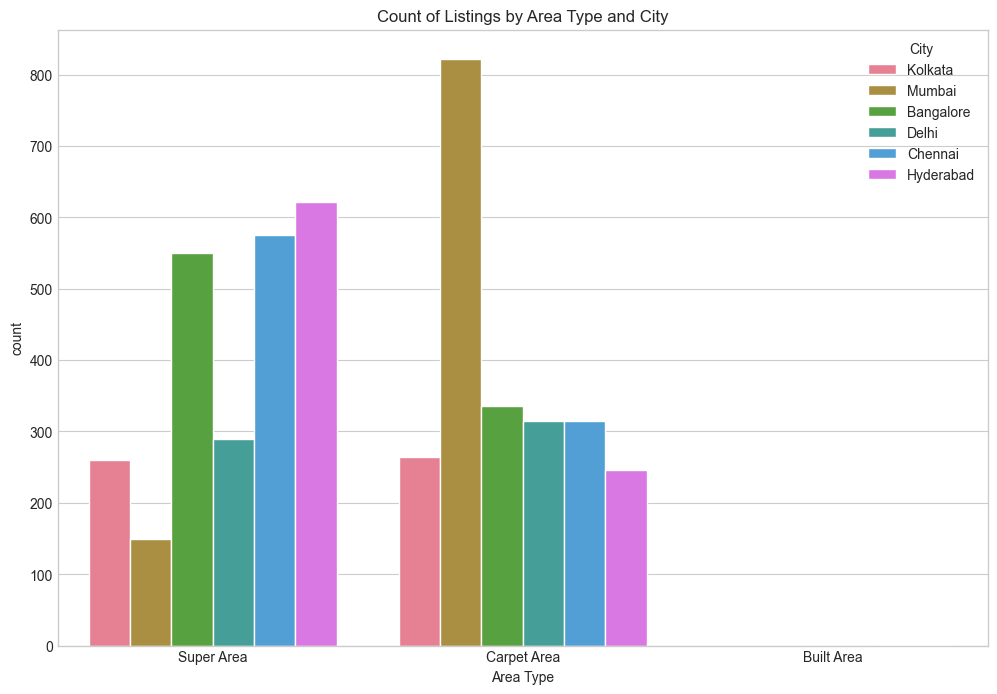

In [91]:
print("\n--- Solution: Area type counts by city ---")
plt.figure(figsize=(12, 8))
sns.countplot(x='Area Type', hue='City', data=df)
plt.title('Count of Listings by Area Type and City')
plt.show()

9. What is the distribution of rent for 'Bachelors' vs 'Family' tenants?


--- Solution: Rent distribution for Bachelors vs Family ---


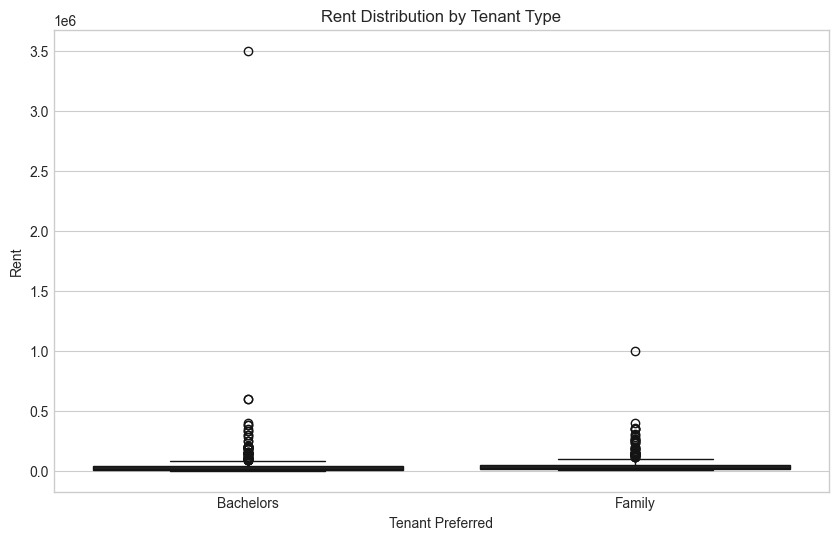

In [92]:
print("\n--- Solution: Rent distribution for Bachelors vs Family ---")
plt.figure(figsize=(10, 6))
sns.boxplot(x='Tenant Preferred', y='Rent', data=df[df['Tenant Preferred'].isin(['Bachelors', 'Family'])])
plt.title('Rent Distribution by Tenant Type')
plt.xlabel('Tenant Preferred')
plt.ylabel('Rent')
plt.show()

10.  Find the city with the highest variance in rent prices.

In [93]:
print("\n--- Solution: City with the highest rent variance ---")
rent_variance = df.groupby('City')['Rent'].agg(np.var).sort_values(ascending=False)
highest_variance_city = rent_variance.index[0]
print(f"The city with the highest rent variance is: {highest_variance_city} with a variance of {rent_variance.iloc[0]:.2f}")


--- Solution: City with the highest rent variance ---
The city with the highest rent variance is: Bangalore with a variance of 14413482903.86


C:\Users\ASUS\AppData\Local\Temp\ipykernel_8568\2048029935.py:2: FutureWarning: The provided callable <function var at 0x000002C629F0B100> is currently using SeriesGroupBy.var. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "var" instead.
  rent_variance = df.groupby('City')['Rent'].agg(np.var).sort_values(ascending=False)


11. Create a scatter plot of 'Rent' vs. 'Size', with the hue representing the 'Furnishing Status'.


--- Solution: Scatter plot of Rent vs. Size by Furnishing Status ---


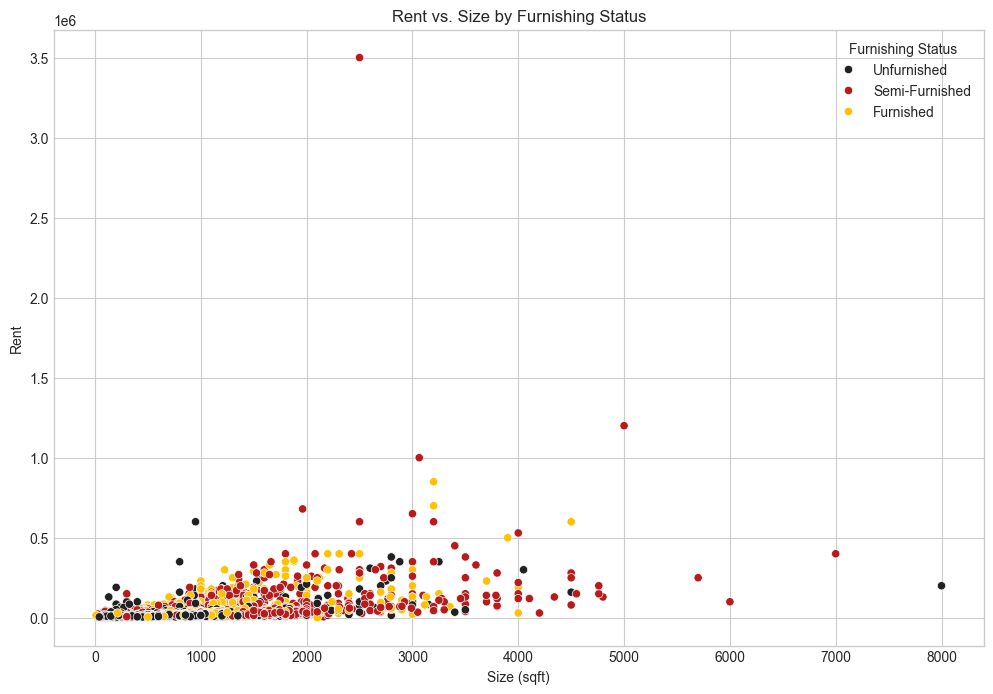

In [94]:
print("\n--- Solution: Scatter plot of Rent vs. Size by Furnishing Status ---")
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Size', y='Rent', hue='Furnishing Status', data=df)
plt.title('Rent vs. Size by Furnishing Status')
plt.xlabel('Size (sqft)')
plt.ylabel('Rent')
plt.show()

12. How many unique values are there in the 'Area Locality' column for each city?

In [95]:
print("\n--- Solution: Number of unique localities per city ---")
unique_localities = df.groupby('City')['Area Locality'].nunique()
print(unique_localities)


--- Solution: Number of unique localities per city ---
City
Bangalore    429
Chennai      323
Delhi        289
Hyderabad    343
Kolkata      252
Mumbai       604
Name: Area Locality, dtype: int64


13. Visualize the distribution of `BHK` counts for each city using a countplot.


--- Solution: BHK count distribution by city ---


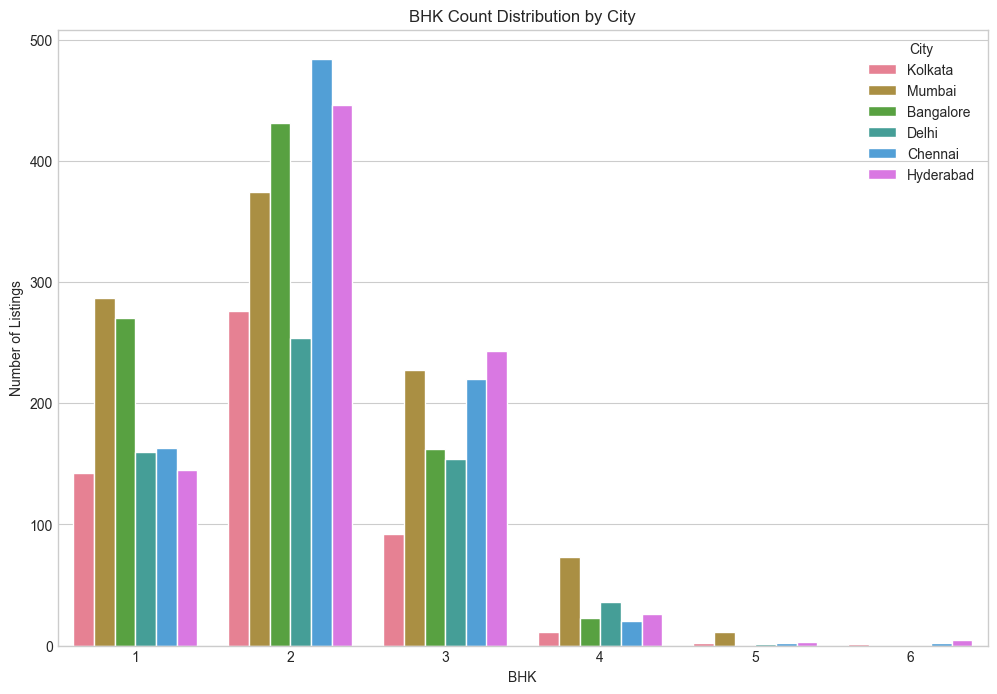

In [96]:
print("\n--- Solution: BHK count distribution by city ---")
plt.figure(figsize=(12, 8))
sns.countplot(x='BHK', hue='City', data=df)
plt.title('BHK Count Distribution by City')
plt.xlabel('BHK')
plt.ylabel('Number of Listings')
plt.show()

14. Compare the average 'Rent' and 'Size' for each 'Furnishing Status' using a grouped bar chart.


--- Solution: Average Rent and Size by Furnishing Status ---


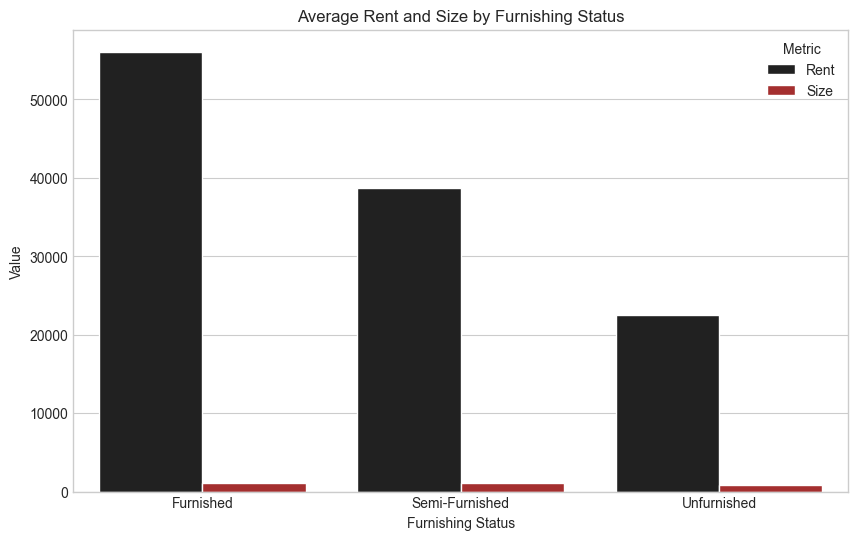

In [97]:
print("\n--- Solution: Average Rent and Size by Furnishing Status ---")
avg_rent_size_furnishing = df.groupby('Furnishing Status')[['Rent', 'Size']].mean().reset_index()
melted_df = pd.melt(avg_rent_size_furnishing, id_vars='Furnishing Status', var_name='Metric', value_name='Value')
plt.figure(figsize=(10, 6))
sns.barplot(x='Furnishing Status', y='Value', hue='Metric', data=melted_df)
plt.title('Average Rent and Size by Furnishing Status')
plt.show()

15. What is the distribution of the number of bathrooms in the dataset?


--- Solution: Distribution of bathroom count ---


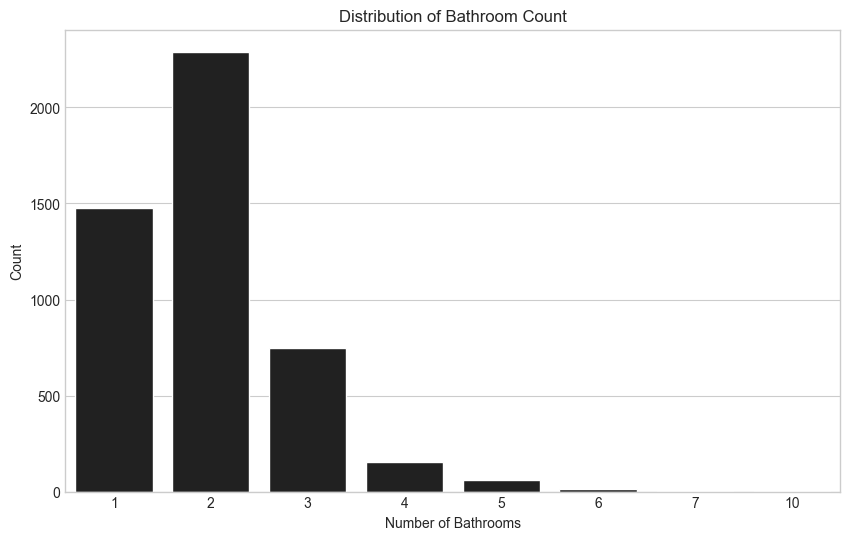

In [98]:
print("\n--- Solution: Distribution of bathroom count ---")
plt.figure(figsize=(10, 6))
sns.countplot(x='Bathroom', data=df)
plt.title('Distribution of Bathroom Count')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Count')
plt.show()

16.  For each city, what is the most common `Area Type`?

In [99]:
print("\n--- Solution: Most common area type per city ---")
most_common_area_type = df.groupby('City')['Area Type'].agg(lambda x: x.mode()[0])
print(most_common_area_type)


--- Solution: Most common area type per city ---
City
Bangalore     Super Area
Chennai       Super Area
Delhi        Carpet Area
Hyderabad     Super Area
Kolkata      Carpet Area
Mumbai       Carpet Area
Name: Area Type, dtype: object


17. Calculate the interquartile range (IQR) of rent for each city.

In [100]:
print("\n--- Solution: IQR of rent per city ---")
q1 = df.groupby('City')['Rent'].quantile(0.25)
q3 = df.groupby('City')['Rent'].quantile(0.75)
iqr = q3 - q1
print(iqr)


--- Solution: IQR of rent per city ---
City
Bangalore    11500.0
Chennai      11500.0
Delhi        19000.0
Hyderabad    12000.0
Kolkata       7850.0
Mumbai       63000.0
Name: Rent, dtype: float64


18. Find the total number of houses for each `Tenant Preferred` category.

In [101]:
print("\n--- Solution: Count of listings by tenant preferred category ---")
tenant_counts = df['Tenant Preferred'].value_counts()
print(tenant_counts)


--- Solution: Count of listings by tenant preferred category ---
Tenant Preferred
Bachelors/Family    3444
Bachelors            830
Family               472
Name: count, dtype: int64


19. Create a pairplot to visualize relationships between numerical features ('Rent', 'Size', 'BHK', 'Bathroom').


--- Solution: Pairplot of numerical features ---


C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages\seaborn\axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
C:\Users\ASUS\AppData\Roa

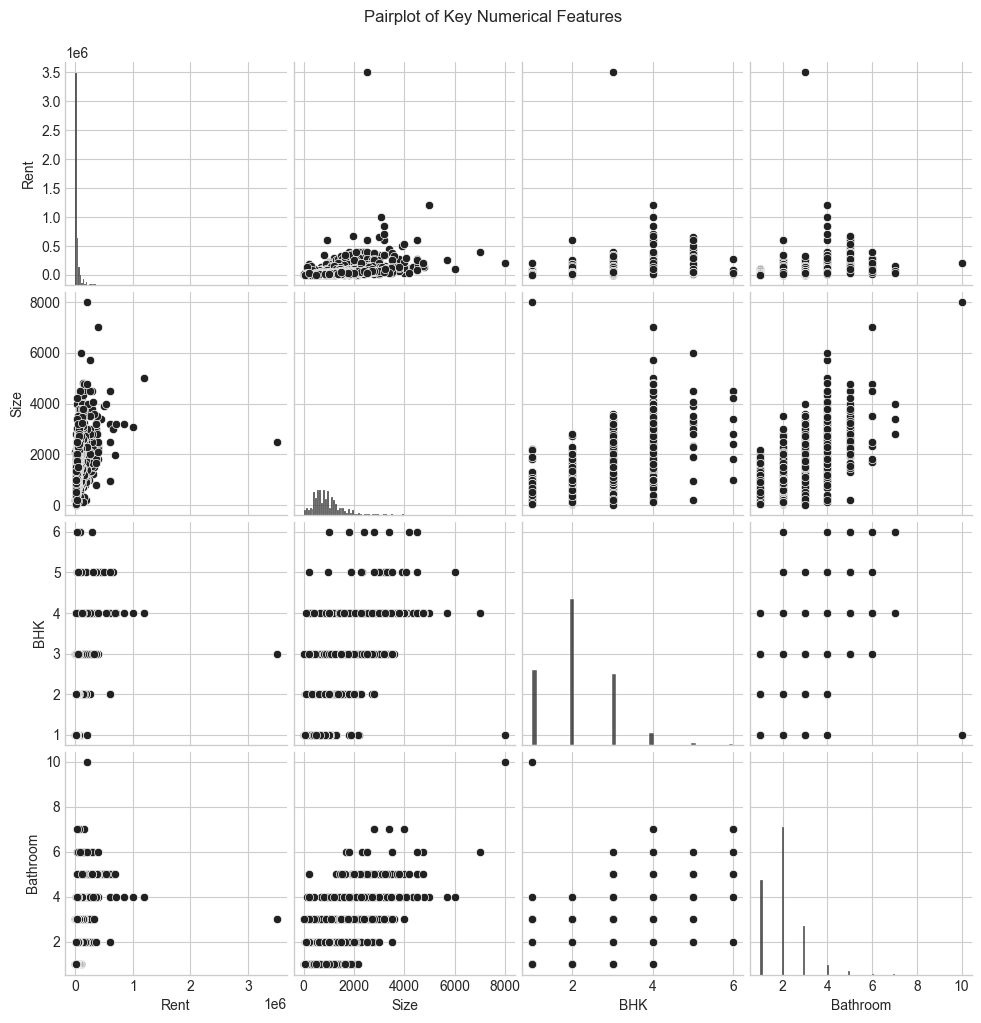

In [102]:
print("\n--- Solution: Pairplot of numerical features ---")
sns.pairplot(df[['Rent', 'Size', 'BHK', 'Bathroom']], palette='viridis')
plt.suptitle('Pairplot of Key Numerical Features', y=1.02)
plt.show()